Mean Absolute Error (MAE): 428.3134013605442
Root Mean Squared Error (RMSE): 688.6623360584215
R² Score: 0.8817282456256393


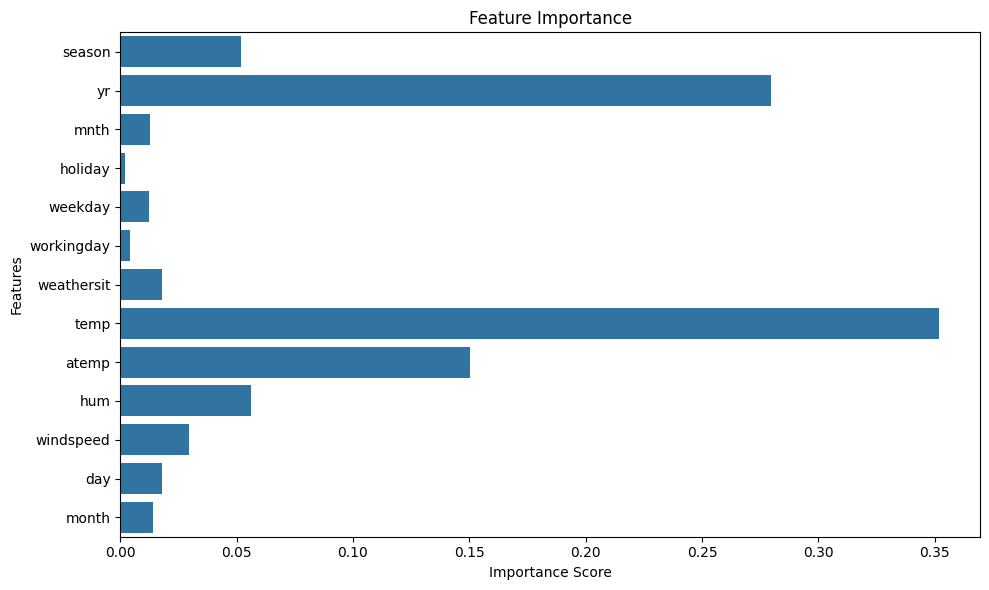

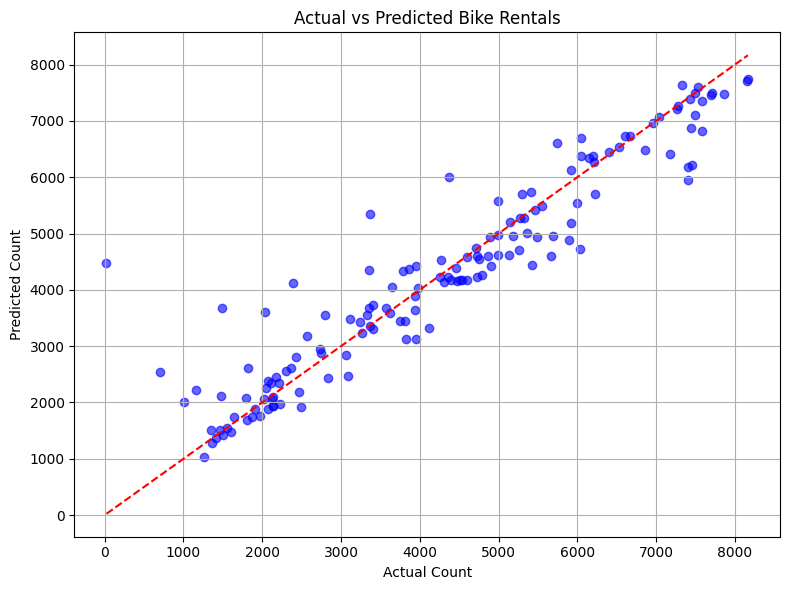

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Random Forest → MAE: 428.31, RMSE: 688.66, R²: 0.88
Tuned Random Forest → MAE: 439.72, RMSE: 696.19, R²: 0.88


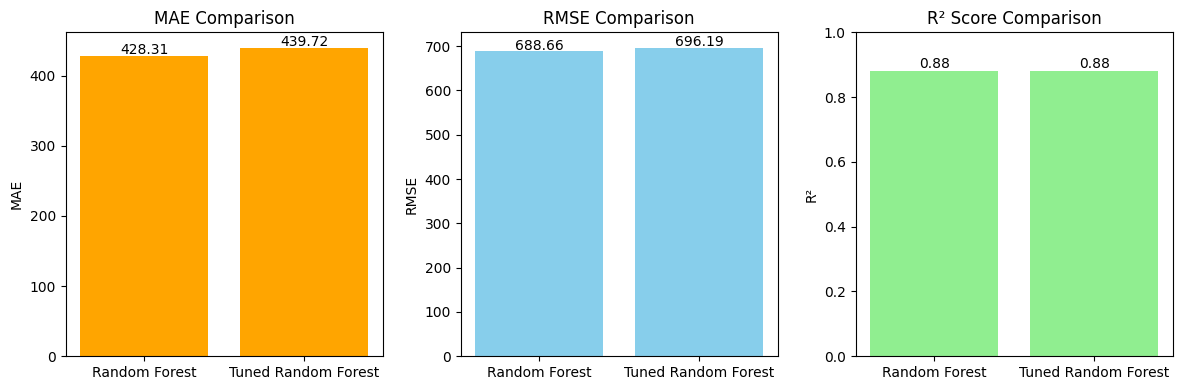

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# Loaded the dataset
df = pd.read_csv('../data/day.csv',sep='\t')
df.head()


# Converted the date column to proper date type
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# Created new columns for day, month, weekday
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['weekday'] = df['dteday'].dt.weekday

# Dropped unnecessary columns
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

#checking columns
df.head()

# X = all features (inputs), y = target (cnt)
X = df.drop(columns='cnt')
y = df['cnt']

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training a random forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)   # Making predictions

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Show most important features
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('./visuals/feature_importance.png')
plt.show()


#Scatter Plot- Actual_vs_Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Bike Rentals')
plt.grid(True)
plt.tight_layout()
plt.savefig('./visuals/ScatterPlot_Actual_vs_Predicted.png')
plt.show()


#Hyperparamter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param_grid,cv=3,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_pred = best_rf.predict(X_test)
best_mae = mean_absolute_error(y_test, best_pred)
best_rmse = np.sqrt(mean_squared_error(y_test, best_pred))
best_r2 = r2_score(y_test, best_pred)
print("Random Forest → MAE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(mae, rmse, r2))
print("Tuned Random Forest → MAE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(best_mae, best_rmse, best_r2))



# Comparison of different models

models = ['Random Forest', 'Tuned Random Forest']
mae_values = [428.31, 439.72]
rmse_values = [688.66, 696.19]
r2_scores = [0.88, 0.88]

plt.figure(figsize=(12, 4))

# MAE plot
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color='orange')
plt.title('MAE Comparison')
plt.ylabel('MAE')
for i, v in enumerate(mae_values):
    plt.text(i, v + 3, f"{v:.2f}", ha='center')

# RMSE plot
plt.subplot(1, 3, 2)
plt.bar(models, rmse_values, color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
for i, v in enumerate(rmse_values):
    plt.text(i, v + 3, f"{v:.2f}", ha='center')

# R² plot
plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color='lightgreen')
plt.title('R² Score Comparison')
plt.ylabel('R²')
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()



In [12]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
month         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int32         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  day         731 non-null  

In [10]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month
0,1,2011-01-01,1,0,1,0,5,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1
1,2,2011-01-02,1,0,1,0,6,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2,1
2,3,2011-01-03,1,0,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3,1
3,4,2011-01-04,1,0,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4,1
4,5,2011-01-05,1,0,1,0,2,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5,1
